<a href="https://colab.research.google.com/github/angeloBuso/algoritmos_ML/blob/main/%5BTemplate_Classificador_Buso%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="header title" width="100%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/Imagem2.jpg?raw=true">

<img alt = "qr-code" align = "right" width="10%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/angelobuso.png?raw=true">


## **1. Compreensão Problema de Negócio**

---

A tecnologia é um indutor global na economia, isso é fato. O *E-Commerce* é um exemplo desse movimento indutor. No entanto enquanto uma grande parte das pessoas estão focadas em desenvolver soluções tecnológicas que facilitam a vida dos usuários, há uma outra parcela que agem no ituito de obterem vantagens ilícitas. Podemos citar as imitações de sites, aplicativos e perfis de empresas em redes sociais estão cada vez mais fidedignas e com essas táticas, esses criminosos roubam os seus dados

["Ter o cartão clonado é algo que assusta 83% dos brasileiros; na comparação, a pandemia é uma grande ameaça para 61% dos entrevistados"](https://epocanegocios.globo.com/Empresa/noticia/2021/10/fraude-no-cartao-e-o-maior-medo-dos-brasileiros.html)

A preocupação dos brasileiros leva em conta o medo de ficarem no prejuízo financeiro, ou pelo menos, o prejuízo até o término na análise do possível fraude, pela operadora do cartão fraudado. 

Sendo assim, as insituições operadoras de cartão tem o dever de monitorar, em tempo real, as transações financeiras, transacionadas pelos cartões de seus clientes. O desafio destas instituições é terem ferramentas que possam prever a probabilidade da transação ser fraude e agir com tempestividade, preservando os dados e o cliente.

Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/hacker-colorido-e-plano-foge-homem-de-composicao-roubar-cartao-de-credito-e-executa-ilustracao-vetorial_1284-30699.jpg" width="100%"></p>

Neste projeto, iremos abordar esse problema **das fraudes em cartões de crédito**, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Fraudes envolvendo cartões de crédito sua não-detecção acaretará prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou comprar uma cadeira gamer com super desconto relâmpago na Amazon e teve seu cartão bloqueado preventivamente, que provavelmente gerou estresse, ou ainda, aquela passagem aérea da Itapemerim com aquele *precinho*....pensando bem esse último ai foi até bom ter dado falso positivo... (rsrsrsrs)

Esse contexto de desafio apresentado podemos usar Inteligência Artificial para tal detecção. Usando (a) uma base histórica, (b) um algoritmo de machine learning e (c) as compreensão das técnicas e boas prátidas da Ciência de Dados, construiremos uma ferramentaque poderá permitir uma economia de milhões de Reais.

### 1.1 Dicionário dados

In [1]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import scikitplot as skplt

%matplotlib inline

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.12


## **2. Coleta Dados**
Como todo projeto de *machine learning* a matéria-prima são  **dados**, utilizaremos uma coleção de informações catalogadas em um período de **2 dias**, por usuários de cartões na Europa. Ao longo desse período foram registradas quase **290 mil transações** envolvendo cartões, sendo que **492 foram fraudes**.

<p align=center>
<img src="https://img.freepik.com/free-vector/concept-credit-card-payment-landing-page_52683-24923.jpg?size=338&ext=jpg" width="75%"></p>

Nota-se que o conjunto de dados é extremamente **desbalanceado**, sendo que as fraudes representam apenas 0,17% do total transacionado.

Uma particularidade interessante é que as variáveis (*features*) são todas numéricas, descaracterizadas das informações originais. Nada mais justo para resguardar esse ativo precioso dessas empresas, **os dados**, além de não expor a confidencialidade dos clientes (por problemas ligados à privacidade e segurança). Sendo assim, as *features* são representadas por $[V1, V2, V3 \dots, V28]$.

[Na fonte dos dados, ](https://www.kaggle.com/mlg-ulb/creditcardfraud) nos é informado que as *features*, para ter essa anonimização, foram transformadas por uma técnica conhecida como Análise de Componentes Principais [(*Principal Component Analysis* - PCA)](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

Em suma, PCA permite **reduzir dimensão** dos dados, enquanto mantém o maior número possível de **informações**. É um algorítmo de otimização que encontra um conjunto novo de recursos - os chamados **componentes**. Podemo deduzir que os componentes achados pela transformação da *PCA*, no dataSet original são as próprias *features* $[V1, V2, V3 \dots, V28]$.

### 2.1 Carga dados
DICA: até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel); acima 3 dim NUMPY (nparray)

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
dados = pd.read_csv(file_path)

In [4]:
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. **Análise Exploratória**


### 3.1 Visão Geral dataSet
Estatística Descritiva:
 * Tipo Objeto
 * Tipo Dados
 * Shape - Dimensionalidade
 * Indices
 * Describe dados


In [5]:
def visaogeral(df, messagem):
    print(f'{messagem}:\n')
    print("Qtd Observações:", df.shape[0])
    print("\nQtd Atributos:", df.shape[1])
    print("\nAtributos:")
    print(dados.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Unicos:")
    print(df.nunique())

In [6]:
visaogeral(dados,'Visão Geral dataSet treino')

Visão Geral dataSet treino:

Qtd Observações: 284807

Qtd Atributos: 31

Atributos:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Qtd Valores missing: 0

Valores Unicos:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Qual tipo de dados é nosso dataSet?



In [8]:
print('Nossos dados são do tipo:', type(dados))

Nossos dados são do tipo: <class 'pandas.core.frame.DataFrame'>


DICA: Se o número de linhas/observações no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo (underfitting- decora ponto dos dados).

Se você tiver muitas colunas/atributos em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior (70% treino) e depois aplique o modelo a novos dados (30% teste) para verificar a performance. Uma boa prática é ter uma massa de dados para validação durante o treinamento.

In [9]:
# Observando os dados finais do dataSet
dados.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
print('Os dados possuem {:f} observações/linhas e {} atributos/colunas.'.format(dados.shape[0], dados.shape[1]))             

Os dados possuem 284807.000000 observações/linhas e 31 atributos/colunas.


DICA: verificar tipo dos dados é muito importante. Pode ser necessário converter strings, ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários. (**informação representa o que está informando**)

In [11]:
tipo = pd.DataFrame(dados.dtypes, columns= ['Tipos de dado'])
tipo.columns.name = 'Variáveis'
tipo

Variáveis,Tipos de dado
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


Verificamos que as informações estão sendo representadas por dados do tipo `float64`, ou seja, dados numéricos decimais. A última variável, a de interesse, está sendo representada por tipo `int64` dados núméricos inteiros.    

In [12]:
# checando índice e sua distribuição
dados.index

RangeIndex(start=0, stop=284807, step=1)

In [13]:
# checando os nomes das colunas
dados.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Resumo das principais estatísticas dos dados.

In [14]:
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
dados.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

A variável `Amount`, que indicado o montante envolvido nas transações, observamos que o valor médio das transações, tanto fraudulentas, quanto genuínas é de 88,34, sendo o valor de 22,00 que divide a amostra ao meio (mediana) e com um desvio padrão de 250,12. Notamos um valor máximo de 25.691,16, candidato a um possível *outlier*. Com isso inferimos que a maioria dos montantes envolvidos é composta por quantias menores.

####  3.1.1  Verificando Missing 

In [16]:
dados.isnull().sum()/dados.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Verificamos que os dados não possuem dados ausentes. Demonstra a qualidade dos dados. Cabe ressaltar que na fonte dos dados já nos indicou que os mesmos já haviam passados por uma fase preparação, dado as questões de sigilos. No entanto, é muito comum nos trabalhos de data science lidar com dados ausentes.


#### 3.1.2 Var_Explanatória e Var_Target

In [17]:
X = dados.drop(columns= 'Class', axis= 1)
y = pd.DataFrame(dados.Class)

In [18]:
print('DataSet original com {} atributos e {} observações'.format(dados.shape[1], dados.shape[0]))
print('As variáveis independentes com {} atributos e {} observações'.format(X.shape[1], X.shape[0]))
print('A variável dependente - iremos prever com {} atributo e {} observações'.format(y.shape[1], y.shape[0]))

DataSet original com 31 atributos e 284807 observações
As variáveis independentes com 30 atributos e 284807 observações
A variável dependente - iremos prever com 1 atributo e 284807 observações


####  3.1.3  Análise da Var_Target

A variável de interesse é o atributo `Class` do nosso data Set. É a variável que indica se a transação do cartão de crédito foi **genuína** ou se tratava de uma **fraude**. Separamos ela para o objeto `y` (item 3.1.2).
As demais variáveis que chamamos de variáveis independentes e as trataremos mais abaixo. Focaremos agora na **variável predita**.

#####  3.1.3.1  Amplitude

In [19]:
y.describe()

,Class
count,284807.000000
mean,0.001727
std,0.041527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
y.nunique()

Class    2
dtype: int64

Observando os valores `max` 1 e o valor `min` 0, bem como o resultado da função `nunique` indica que variável target é do tipo categórica e possui 2 categorias: 0 = transação genuína, 1 = transação fraudulenta. Estamos diante de um problema de aprendizado supervisionado do tipo **classificação**.

#####  3.1.3.2  Balanceamento dados
Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. Podemos ver abaixo que existe uma clara desproporção entre as classes 0 (genuína) e 1 (fraude).

In [21]:
y.value_counts()

Class
0        284315
1           492
dtype: int64

In [22]:
print("\nTransações fraudulentas representam {:.4f}% do dataSet".format((dados[dados.Class==1].shape[0]/dados.shape[0])*100))
print("Enquanto transações genuínas são {:.4f}% dos dados.\n".format((dados[dados.Class==0].shape[0]/dados.shape[0])*100))


Transações fraudulentas representam 0.1727% do dataSet
Enquanto transações genuínas são 99.8273% dos dados.



#####  3.1.3.3  Plots Var_Target

In [23]:
print((y.loc[y.Class == 1].sum() / y.shape[0])*100)
pct_class = round((dados.Class.sum()/dados.shape[0])*100, 3)
pct_class

Class    0.172749
dtype: float64


0.173

Class
0        284315
1           492
dtype: int64


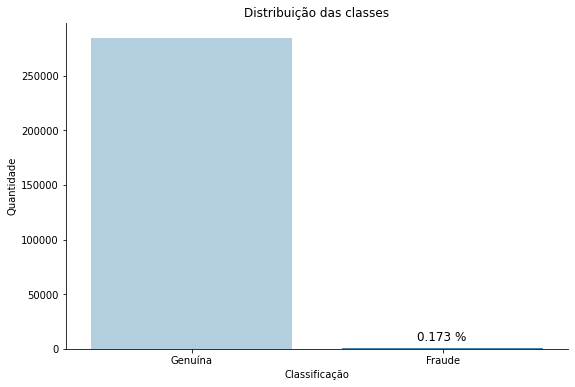

In [24]:
print(y.value_counts())
fig, ax = plt.subplots(figsize= (9,6), dpi= 72)
sns.countplot('Class', data= y, palette= 'Blues', ax= ax)
ax.set_title('Distribuição das classes')
plt.annotate(str(pct_class)+" %", xy=(0.9 , 15000), xytext=(0.9, 8000), size=12)
plt.ylabel("Quantidade")
plt.xlabel("Classificação")
plt.xticks([0,1], ['Genuína', 'Fraude'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

A variável *target* possui apenas 0,17% de representação em todo nosso dataSet. Esse percentual de `transações fraudulentas` é bem menor que o de `transações genuínas`. Quando alguma categoria é muito rara, menor que 5%, é recomendado realizar o balanceamento de classes. Nesse caso será necessário.

##### 3.1.3.4 Relações Var_target

###### a) Variável `Time`

Representa o número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados

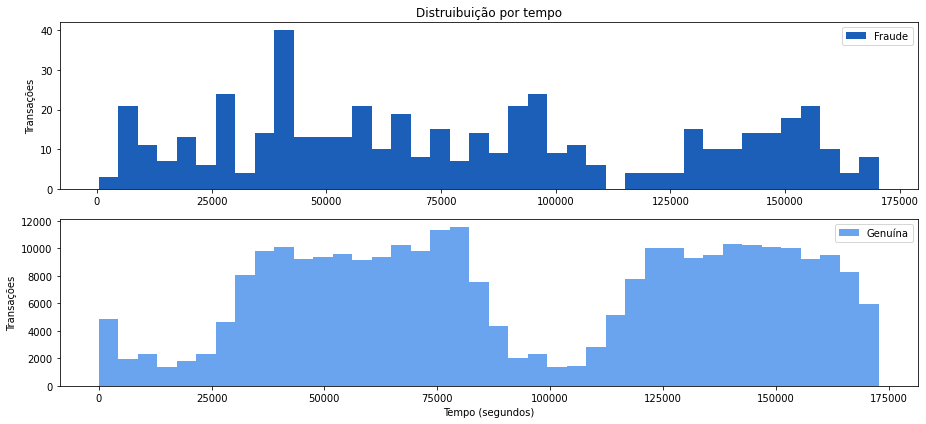

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows= 2, ncols= 1, figsize= (13,6))

dados.Time.loc[dados.Class == 1].plot(kind= 'hist', ax= ax1, label= 'Fraude', color= '#1C5FB8', bins= 40)
ax1.legend()
ax1.set_ylabel('Transações')
dados.Time.loc[dados.Class == 0].plot(kind= 'hist', ax= ax2, label= 'Genuína', color= '#6BA4EE', bins= 40)
ax2.legend()
ax1.set_title('Distruibuição por tempo')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Ao longo da dimensão `Time`, atributo que indica o tempo em segundos da 1ª transação monitorada até o momento do acontecimento, entretanto não conseguimos inferir nenhuma informação a partir da distribuição do tempo e tipo de transação.

###### b) Variável `Amount`
Nos informa os valores das transações, separando pela descrição do tipo da transação, temos:

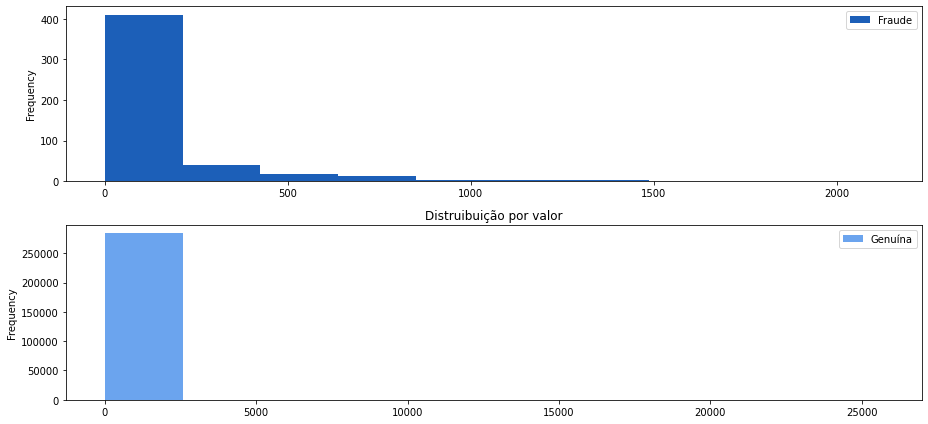

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows= 2, ncols= 1, figsize= (13,6))

dados.Amount.loc[dados.Class == 1].plot(kind= 'hist', ax= ax1, label= 'Fraude', color= '#1C5FB8')
ax1.legend()
dados.Amount.loc[dados.Class == 0].plot(kind= 'hist', ax= ax2, label= 'Genuína', color= '#6BA4EE')
ax2.legend()
plt.title('Distruibuição por valor')
plt.tight_layout()

Quando **genuína**:

In [27]:
dados.Amount.loc[dados.Class==0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Observamos que 75% dos dados estão entre o valor de 0,00 à 77,05. Analisando os restantes 25% dos dados genuínos.

In [28]:
seletor = (dados.Class==0) & (dados.Amount > 77.05)
dados['Amount'][seletor].describe()

count    71062.000000
mean       294.640875
std        438.512600
min         77.060000
25%        108.240000
50%        165.000000
75%        303.800000
max      25691.160000
Name: Amount, dtype: float64

Podemos verificar que cerca de 93% dos valores das transações genuínas etão abaixo do valor de 303,80.

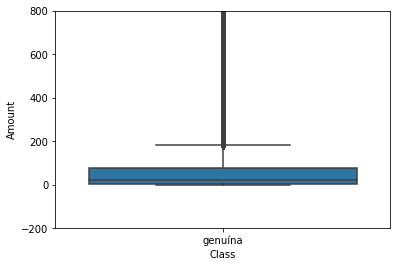

In [29]:
sns.boxplot(x= 'Class', y= 'Amount', data= dados.loc[dados.Class==0])
plt.ylim((-200,800))
plt.xticks([0],['genuína']);

Quando **fraudulenta**:

In [30]:
dados.Amount.loc[dados.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

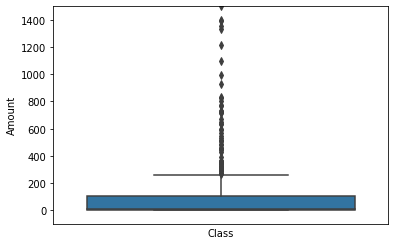

In [31]:
sns.boxplot(x= 'Class', y= 'Amount', data= dados.loc[dados.Class==1])
plt.ylim((-100,1500))
plt.xticks([1], ['fraude']);

Existe diferenças no padrão transações em relação ao atributo `Amount`.Tal distribuição diferente para as duas classes provavelmente irá contribuir para o treinamento do modelo de machine learning.

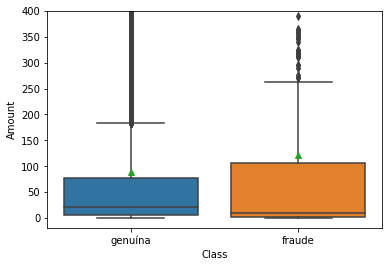

In [32]:
sns.boxplot(x= 'Class', y= 'Amount', data= dados, showmeans= True)
plt.ylim((-20,400))
plt.xticks([0,1], ['genuína', 'fraude']);

#####  3.1.3.5  Distribuição Dados

Distribuição geral dos dados, temos:

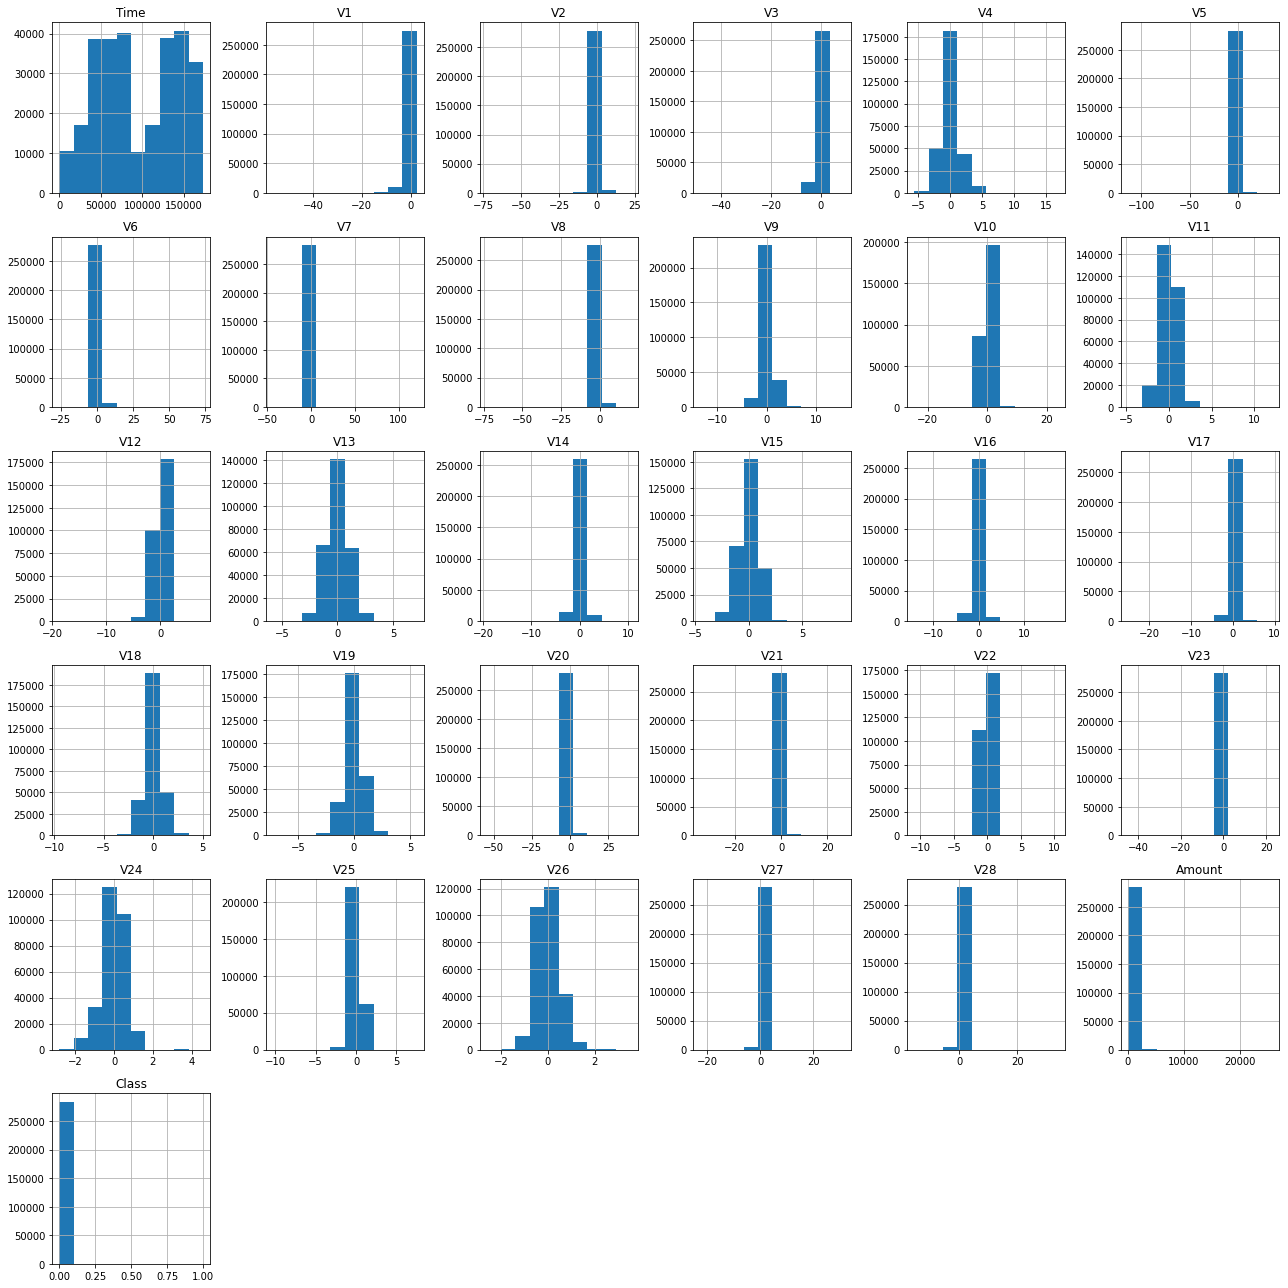

In [33]:
plt.rcParams['figure.figsize']= (18,18)
dados.hist()
plt.tight_layout()

Um gráfico de densidade é muito útil para verificar como se comporta as distribuições de cada variável, segregada por classe, afim de detectar possíveis anomalias, bem como qual atributo possuem distribuições que diferem uma da outra, permitindo identificar as **classes positivas** (fraudes, nesse caso) mais facilmente.

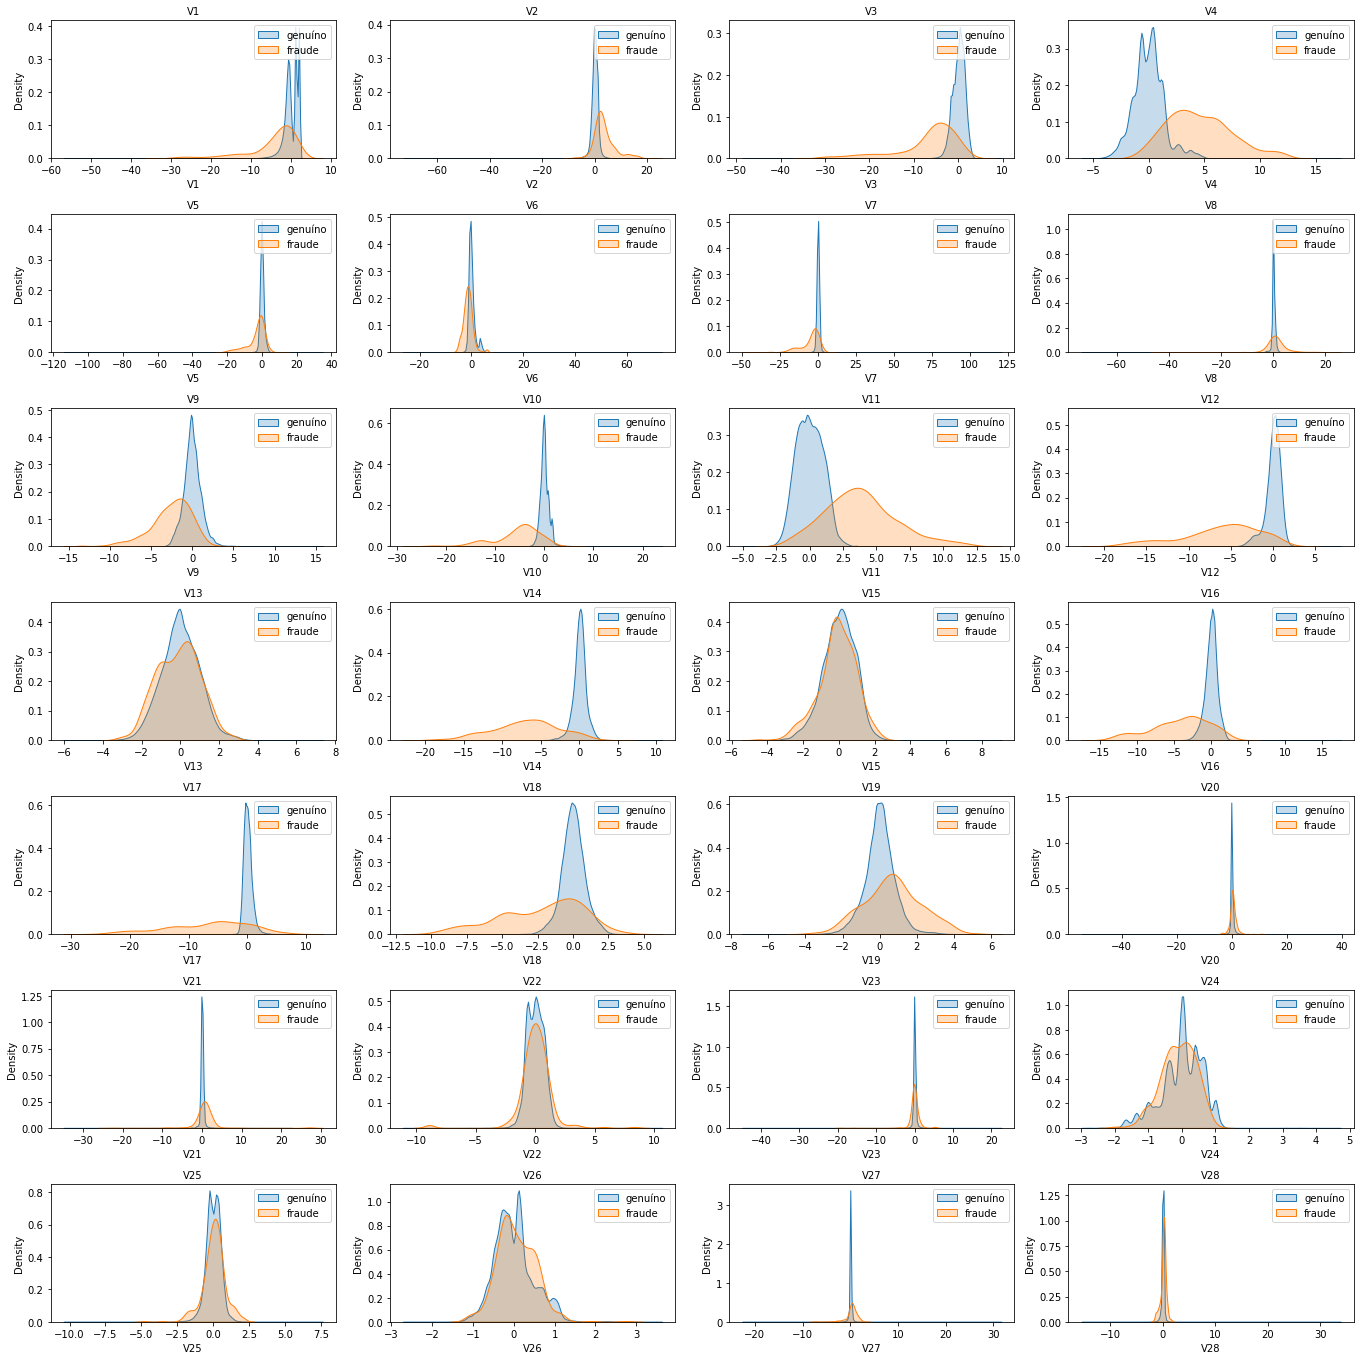

In [34]:
from IPython.core.pylabtools import figsize
# indicando quais colunas serão plotados e quantos plots teremos
colunas_grf = dados.drop(['Time', 'Amount', 'Class'], axis=1).columns
qtd_plots = len(colunas_grf)

# separar dados em fraude e genuíno
dados_genuino = dados[dados.Class == 0]
dados_fraude = dados[dados.Class == 1]

# espaço do plot
fig, ax = plt.subplots(nrows= 7, ncols= 4, figsize= (19,19))
fig.subplots_adjust(hspace=1, wspace=1)

# plot
index= 0
for coluna in colunas_grf:
  index += 1
  plt.subplot(7,4, index)
  sns.kdeplot(dados_genuino[coluna], label= 'genuíno', shade= True)
  sns.kdeplot(dados_fraude[coluna], label= 'fraude', shade= True)
  plt.title(coluna, fontsize= 10)
  plt.legend()
plt.tight_layout()

Com isso podemos inferir que os atributos `V3`, `V4`, `V11` e `V12` podem ter possível poder preditivo em separar uma transação fraudulenta de uma genuína.

####  3.1.4  Análise da Var_Explanatória

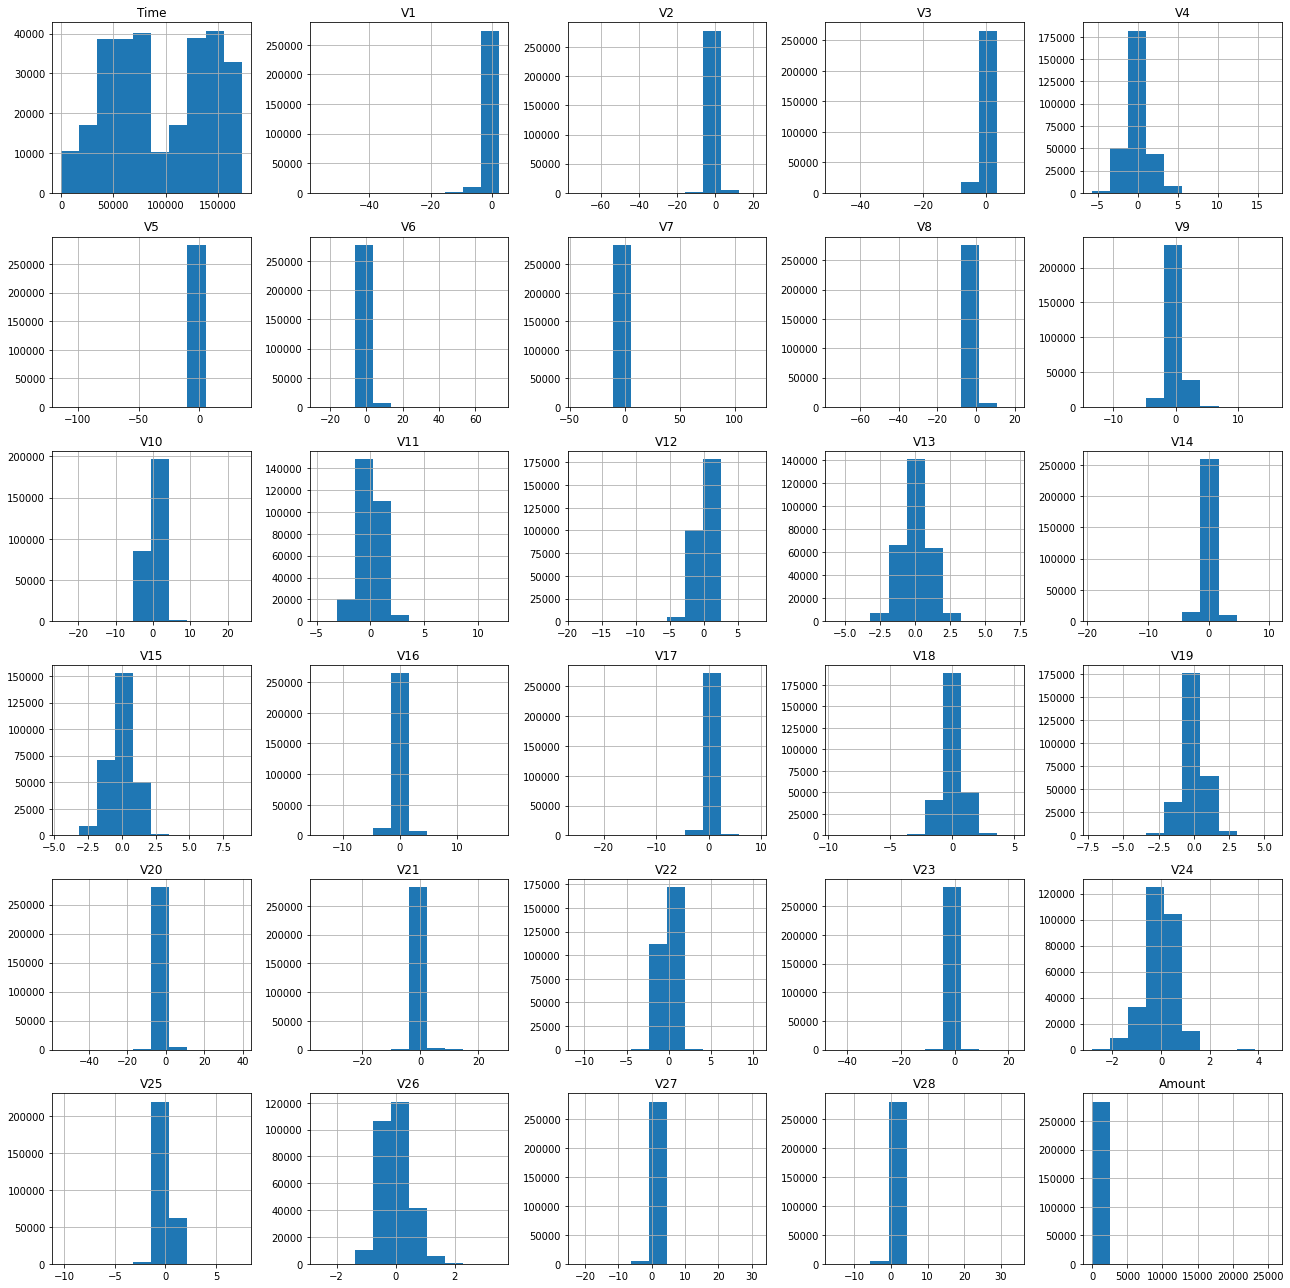

In [35]:
plt.rcParams['figure.figsize']= (18,18)
X.hist()
plt.tight_layout()

Vizualizando as variáveis explanatórias, observamos que os atributos `Time` e  `Amount`, não tiveram as mesmas transformações que as demais. Isso se dá pelo fato de que as demais variáveis explanatórias `V1` a `V28` são resultados de componentes principais, transformadas pela técnica conhecida como PCA (Principal Component Analysis), como já discorrido no início do notebook, de certa forma (i) tornou os dados anonimizados e (ii) colocou-os em um formato padronizados.

###### 3.1.4.2.1 Correlação Atributos

Abaixo apresentamos uma matrix de correlação com o dataSet sem nenhum pré-processamento. A propósito, a matriz de correlação buscar identificar a força na relação entre dois atributos.

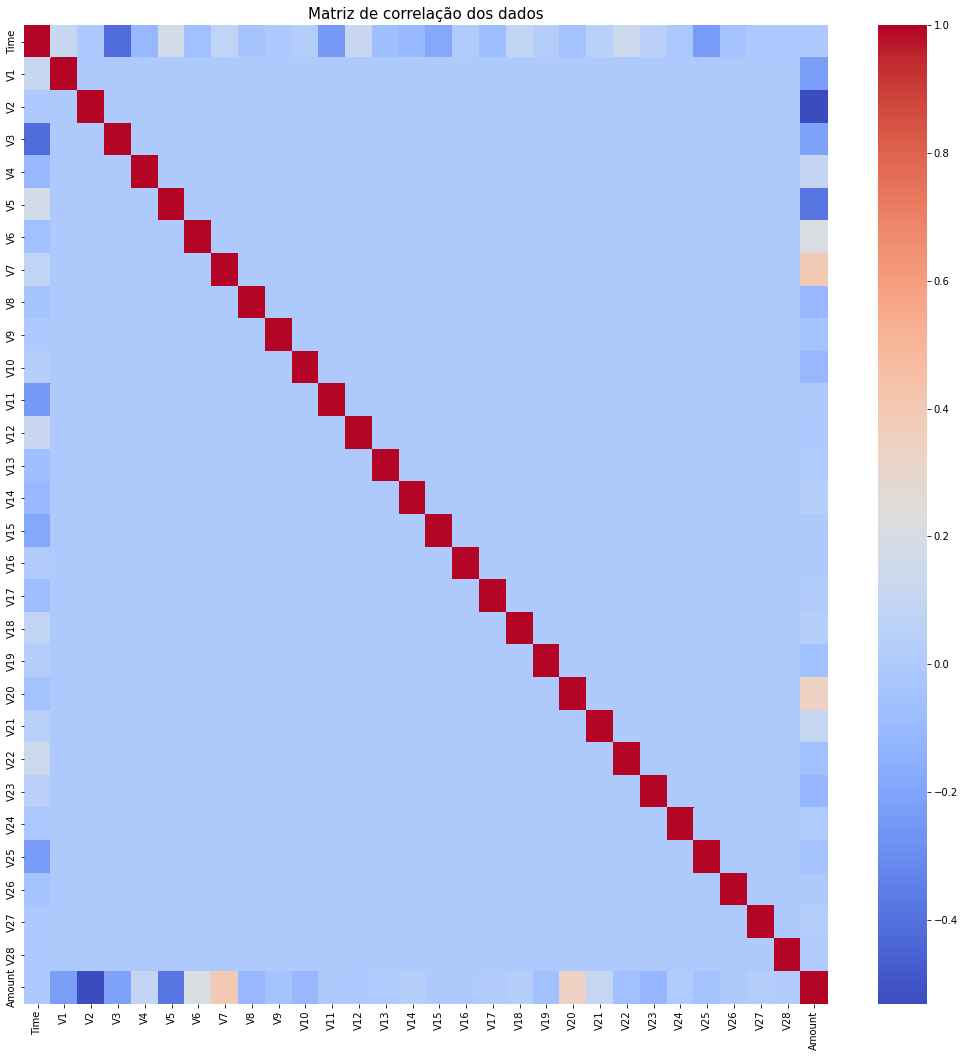

In [36]:
sns.heatmap(X.corr(),annot = False, cmap="coolwarm")
plt.title("Matriz de correlação dos dados",fontsize= 15)
plt.show()

Nesta fase de análise exploratória dos dados podemos verificar que:


1.   A classe positiva (não relacione o sentido da palavra "positivo" com o objetivo do projeto, que é dectar fraude) encontra-se com baixíssima ocorrência no dataSet, mostrando um possível desbalanceamento dos dados. A classe fraudulenta representa 0,17% do total de entradas.
1.   Os dados não possuem dados *Missing's*. (Cabe ressaltar que os dados já estavam bem estruturados, na maioria dos casos encontamos dados nulos que devem ser tratados na fasé de pré-processamento)
2.   Os atributos, ao serem anonimizados pela técnica de PCA, assume-se a premissa que foram padronizadas.
2.   Ao passo que, as colunas `Time` e `Amount` não estão padronizados, como as demais *features*


## **4. Pré-Processamento dados**
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.
É muito provável que você tenha que realizar tarefas de **pré-processamento** nos dados. Esse é um passo extremamente necessário dentro do processo.

O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas, é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning. ***Testar é o lado divertido de Ciência de dados!!***

### 4.1 Feature Scaling

#### 4.1.1 Padronização
técnicas: from sklearn.preprocessing import
* (i) StandardScaler

Útil para algorítimos que  pressupõem  uma  distribuição  gaussiana  nas variáveis de entrada e funcionam melhor com dados reescalonados, como regressão linear, regressão logística e análise discriminante linear. Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1.

`Time` e `Amount`

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [37]:
# a. cópia do dataSet
dados_pdr = dados.copy()

# a.1 reservando para novas previsões (15%)
dados_new = dados_pdr.sample(frac= 0.15, random_state= 0)

# a.2 obtendo os 85% restantes dos dados para o modelo
dados_pdr = dados_pdr.drop(dados_new.index)

# b. instancia um objeto do tipo StandardScaler
scaler = StandardScaler()

# c. aplicando a transformação nos dados
dados_pdr['Time_std'] = scaler.fit_transform(dados_pdr['Time'].values.reshape(-1,1))
dados_pdr['Amount_std'] = scaler.fit_transform(dados_pdr['Amount'].values.reshape(-1,1))

# d. deletar as colunas "despadronizadas"
dados_pdr.drop(['Time', 'Amount'], axis=1, inplace= True)
dados_pdr.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_std,Amount_std
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.997399,0.246341
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.997399,-0.346945
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.997378,1.171178
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.997378,0.140872
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.997357,-0.075195


A informação é a mesma apenas em escala diferente!!!

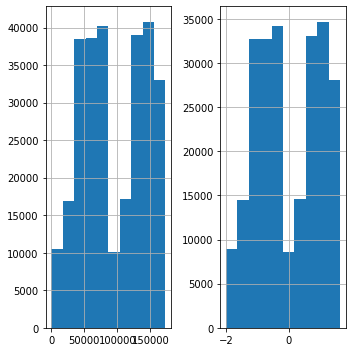

In [38]:
plt.rcParams['figure.figsize']= (5,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1)

dados.Time.hist(ax= ax1)
dados_pdr.Time_std.hist(ax= ax2)
plt.tight_layout()

### 4.2 Split dados
Dividir os dados em `Treino` e `Teste`   é uma boa prática para garantir um modelo mais **generalista** possível.

técnicas: sklearn.model_selection import
* (i) train_test_split-estático
* (ii) Cross-validation-randômico

#### 4.2.1 Estático

O split de dados é uma boa prática. Para realizar há necessidade de realizar a a segregação da `variável Target` do dataSet. Já realizamos esse procedimento anteriormente (item 3.1.2) deste Colab. Como realizamos atividades de *Feature scaling*, usaremos o dataSet padronizada para obter o `X`, variáveis preditoras e o `y`  variável a ser predita, além de ser como os algortimos de ML do Sckit esperam receber os dados!!!

In [39]:
X = dados_pdr.drop(columns= 'Class', axis= 1)
y = dados_pdr['Class']


O parâmetro `stratify=True`, garante que os conjuntos de Treino e Teste tenham a mesma quantidade de classes proporcionalmente e o parâmetro `shuffle=T`, embaralha o dataSet, indicando aleatoriedade.

In [40]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, shuffle=True)

In [41]:
print('tamanho total dos dados são {}, para treino temos {} e teste são {}'.format(dados_pdr.shape[0], len(X_treino), len(X_teste)))

tamanho total dos dados são 242086, para treino temos 181564 e teste são 60522


Importante destacar que mesmo splitando os dados, devemos manter a propocionalidades entre as classes. No início do jupyter (3.1.3.2) verificamos que a classe fraudulenta representa cerca de 0.1727% do dataSet. Após a divisão dos dados é importante verificar essa relação. Abaixo é mostrado como ficou o balanceamento nos dados de treino e teste.

In [42]:
bal_treino = ((y_treino.value_counts() / len(y_treino))*100)[1]
bal_teste = ((y_teste.value_counts() / len(y_teste))*100)[1]
print('percentual de classes fraudulenta nos dados de teste:{} % e dados de treino:{} %'.format(bal_teste, bal_treino))

percentual de classes fraudulenta nos dados de teste:0.17349063150589866 % e dados de treino:0.1723910026216651 %


Mantidas as proporsionalidaes originais, seguiremos para o balanceamento das classes.

### 4.3 Feature Engineer
#### 4.3.1 Balanceamento de classes 
Balanceamento dos dados: são técnicas para manter um "certo balancemanto" entre as classes, pois se temos classe majoritária o modelo de ML, possivelmente aprenderá mais sobre ela, logo temos um problema -> modelo sem generalização, devemos evitar.
Podemos utilizar:
* **oversampling** : cria-se de forma randômica, dados sintéticos para classe minoritária, com base em regras estatísticas e de forma aleatória.
* **undersampling**: remove-se alguns registros da classe majoritária, preservando as características da classe minoritária, ideal para quando se há um grande volume de dados. Este método pode acarretar em um desempenho inferior na hora de fazer predições da classe majoritária, pois reduz o tamanho do dataset.
* [**ADASYN**](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn): cria novas amostras (over-sampling), próximas às originais que são classificadas de forma errada usando um classificador K-Nearest Neighbors.
* [**SMOTE**](https://arxiv.org/abs/1106.1813): Synthetic Minority Over-sampling Technique, método de amostragem excessiva da classe minoritária envolve a criação de exemplos (over-sampling) sintéticos de classes minoritárias

**ATENÇÃO 1**: o ideal é sempre aplicar as técnicas depois de realizar o split dos dados (treino e teste). Se aplicar o balancemento antes, o padrão usado para aplicar o oversampling/undersampling será o mesmo nos dados de treino e de teste, com isso a avaliação do modelo fica comprometida.

**ATENÇÃO 2**: você ao tomar decisão de balancear os dados, diretamente está alterando seu conjunto de dados. Ou seja, saiba ***o que*** está fazendo e ***para que*** está fazendo!!!!


Da biblioteca `imblearn` é possível aplicar técnicas de balanceamento de dados. Usaremos além do *Undersampling* que remove amostras da classe majoritário, preservando assim a classe minoritária. Mais 2 técnicas de over-sampling para fins de compararação qual mais se adequa aos dados e o propósito do projeto, bem como o uso dos dados desbalanceados.
* método 1 : undersampling
* método 2 : SMOTE
* método 3 : ADASYN

In [43]:
# a. instanciar as classes dos métodos pretendidos
rus = RandomUnderSampler()
smt = SMOTE()
ada = ADASYN()

# b. usam método fit_sample() para usar a técnica
X_treino_rus, y_treino_rus = rus.fit_resample(X_treino, y_treino)
X_treino_smt, y_treino_smt = smt.fit_resample(X_treino, y_treino)
X_treino_ada, y_treino_ada = ada.fit_resample(X_treino, y_treino)

Verificando o balanceamento

In [44]:
print("método 1:\n", y_treino_rus.value_counts(),"\n")
print("método 2:\n", y_treino_smt.value_counts(),"\n")
print("método 3:\n", y_treino_ada.value_counts())

método 1:
 1    313
0    313
Name: Class, dtype: int64 

método 2:
 1    181251
0    181251
Name: Class, dtype: int64 

método 3:
 0    181251
1    181237
Name: Class, dtype: int64


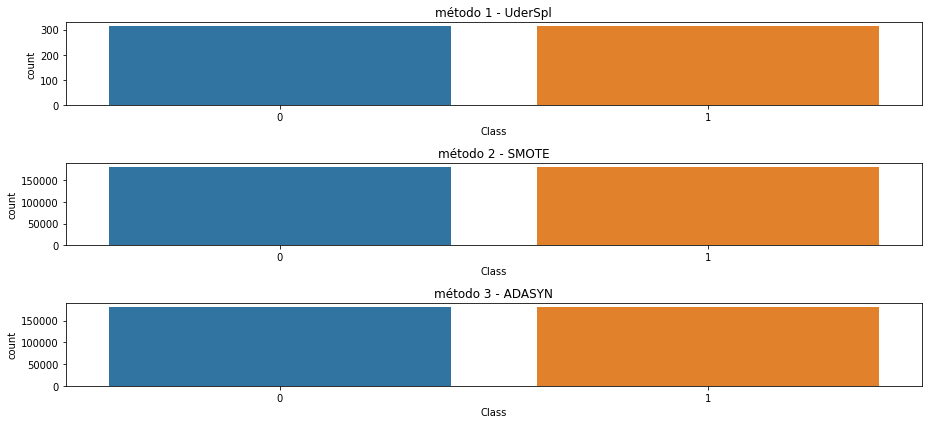

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 3, ncols= 1, figsize= (13,6))

sns.countplot(y_treino_rus, ax= ax1)
ax1.set_title('método 1 - UderSpl')
sns.countplot(y_treino_smt, ax= ax2)
ax2.set_title('método 2 - SMOTE')
sns.countplot(y_treino_ada, ax= ax3)
ax3.set_title('método 3 - ADASYN')
plt.tight_layout()

Didaticamente, vamos observar como se dá a correlação entre os atributos com os dados balanceados.

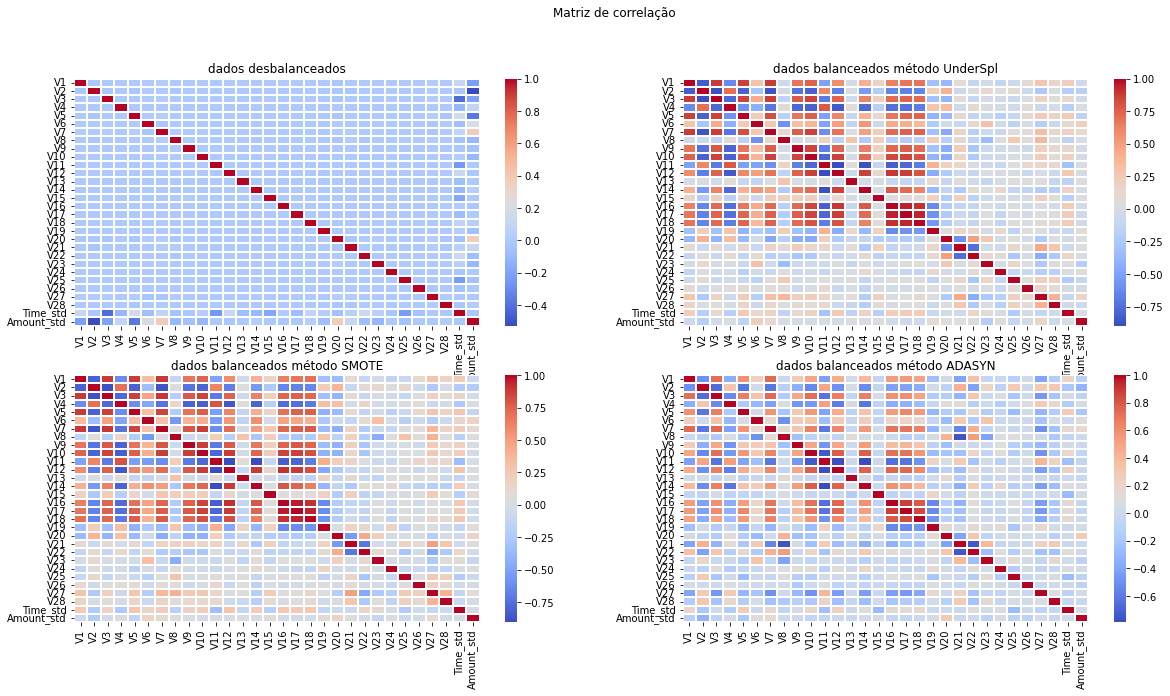

In [46]:
correlacao = X_treino.corr()
correlacao_rus = X_treino_rus.corr()
correlacao_smt = X_treino_smt.corr()
correlacao_ada = X_treino_ada.corr()

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
fig.suptitle('Matriz de correlação')

sns.heatmap(correlacao,
            xticklabels = correlacao.columns,
            yticklabels = correlacao.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[0][0])
ax[0][0].set_title('dados desbalanceados')

sns.heatmap(correlacao_rus,
            xticklabels = correlacao_rus.columns,
            yticklabels = correlacao_rus.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[0][1])
ax[0][1].set_title('dados balanceados método UnderSpl')

sns.heatmap(correlacao_smt,
            xticklabels = correlacao_smt.columns,
            yticklabels = correlacao_smt.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[1][0])
ax[1][0].set_title('dados balanceados método SMOTE')

sns.heatmap(correlacao_ada,
            xticklabels = correlacao_ada.columns,
            yticklabels = correlacao_ada.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[1][1])
ax[1][1].set_title('dados balanceados método ADASYN')

plt.show()

Ao balancear os dados, alguns atributos observa-se correlações mais fortes!!!

= output: dados pré-processados e splitados para iniciar a construção do modelo de ML

## **5. Seleção Algoritmo**
Dado o problema de negócio, a seleção do algoritmo se dá pelo modelo que apresentou melhor performance, sendo assim temos que treinar o algoritmo, testar e validar. Logo podemos utilizar (i) individualizar/automatizar modelos de algoritmos de ML ou (ii) usar algoritmos tipo ensemble.

Para este projeto usaremos 2 algoritmos de ML para problemas de classificação,
* (i.) [Regressão Logística](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148) é um algoritmo de análise preditiva e se baseia no conceito de probabilidade.
* (ii.) Árvore de decisão, são construídas a partir de um processo de indução, onde os dados são divididos em subconjuntos cada vez mais puro - ganho de informação e entropia.

Treinaremos esses 2 algorítmos com os 4 dataSet que possuímos sendo 1 com dados *desbalanceados* e 3 com técnicas diferentes de balanceamento.


#### (i) individualizar/automatizar

### 5.1 (i) - individualizado (split estático)

#### 5.1.1 criar modelo 

No modelo de Árvores de Decisão, instanciamos ajustando alguns *hyperparâemtros* do algorítmo. Não trataremos, neste projeto, dos hyperparâemtros, no entanto, é através destes hyperparâmetros que impactamos na construção de modelos de ML.


In [47]:
modelo_RL_1 = LogisticRegression()
modelo_RL_2 = LogisticRegression()
modelo_RL_3 = LogisticRegression()
modelo_RL_4 = LogisticRegression()

modelo_DT_1 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modelo_DT_2 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modelo_DT_3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modelo_DT_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy')


In [48]:
print(type(modelo_RL_1))
print(type(modelo_DT_1))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


Pronto!! Isso é um modelo de Aprendizado de Máquina!!! Um objeto istanciado com a classe do algortimo que busca responder nosso problema de negócio!!!

#### 5.1.2 treino modelo (.fit) 

Agora iremos treinar os modelos instanciados com dados tanto desbalanceados, quanto com os dados balanceados pelas 3 técnicas citadas acima.


In [49]:
modelo_RL_1.fit(X_treino, y_treino)
modelo_RL_2.fit(X_treino_rus, y_treino_rus)
modelo_RL_3.fit(X_treino_smt, y_treino_smt)
modelo_RL_4.fit(X_treino_ada, y_treino_ada)

modelo_DT_1.fit(X_treino, y_treino)
modelo_DT_2.fit(X_treino_rus, y_treino_rus)
modelo_DT_3.fit(X_treino_smt, y_treino_smt)
modelo_DT_4.fit(X_treino_ada, y_treino_ada)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### 5.1.3 teste modelo (.predict)

Para estimar quão bem o modelo irá performar diante de novos dados, objetivo principal de um modelo preditivo é calcular atráves da aplicação do modelo aos **dados de teste**. Ou seja, é entregue ao modelo dados de **teste**, informações que ele não viu ainda, para verificar o quão **generalizável** está o modelo.



In [50]:
y_pred_RL_1 = modelo_RL_1.predict(X_teste)
y_pred_RL_2 = modelo_RL_2.predict(X_teste)
y_pred_RL_3 = modelo_RL_3.predict(X_teste)
y_pred_RL_4 = modelo_RL_4.predict(X_teste)

y_pred_DT_1 = modelo_DT_1.predict(X_teste)
y_pred_DT_2 = modelo_DT_2.predict(X_teste)
y_pred_DT_3 = modelo_DT_3.predict(X_teste)
y_pred_DT_4 = modelo_DT_4.predict(X_teste)


Em problemas de classificação as previsões se referem à probabiblidade da observação pertencer à classe positiva, que no caso é **transação fraudulenta**. Usando um recurso do Sckit encontramos a probabilidade de pertencimento para cada classe possível, usando um método do algoritmo de Regressão logística: `predict_proba(x)`. 



In [51]:
y_pred_RL_1_prob = modelo_RL_1.predict_proba(X_teste)
y_pred_RL_2_prob = modelo_RL_2.predict_proba(X_teste)
y_pred_RL_3_prob = modelo_RL_3.predict_proba(X_teste)
y_pred_RL_4_prob = modelo_RL_4.predict_proba(X_teste)

y_pred_DT_1_prob = modelo_DT_1.predict_proba(X_teste)
y_pred_DT_2_prob = modelo_DT_2.predict_proba(X_teste)
y_pred_DT_3_prob = modelo_DT_3.predict_proba(X_teste)
y_pred_DT_4_prob = modelo_DT_4.predict_proba(X_teste)

In [52]:
print(y_pred_RL_1[489])
print(y_pred_RL_1_prob[489])


0
[9.99823820e-01 1.76180054e-04]


Ou seja, com esse método podemos verificar que para o primeiro registro dos dados de teste, o modelo preveu que seria 0 (transação genuína) pois a classe 0 teve 99,98% de chance de ocorrer.

#### 5.1.4 performance modelo (.score)
Os dados de **teste** são usados nesta fase para verificar o quão bem está o modelo. Modelo foi treinado com os dados de **treino**, fizemos previsões com os dados de teste, agora iremos comparar a previsões como o que realmente deveria ser previsto,

Usaremos duas métricas, dentre várias que podemos usar para problemas de classificação, a saber:
* Acurácia: medida de performance intuitiva, mede a acurácia geral do modelo, é o quociente das previsões corretas pelao total das previsões.
* [AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772): é uma das melhores métricas para avaliação seu modelo, uma vez que quando as previsões estão 100% erradas seu valor é zero e quando estão 100% certas seu valor é 1. Cada modelo vai apresentar um valor de AUC, isso nos auxilia a determinar o melhor modelo.

In [53]:
print("---------------- Curva AUC Regressão Logistica -----------------")
print('AUC_RL_1: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_1)))
print('AUC_RL_2: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_2)))
print('AUC_RL_3: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_3)))
print('AUC_RL_4: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_4)))

print("---------------- Curva AUC Decision Tree -----------------")
print('AUC_DT_1: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_1)))
print('AUC_DT_2: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_2)))
print('AUC_DT_3: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_3)))
print('AUC_DT_4: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_4)))
print("---------------- Acurácia Regressão Logística ---------------------")
print('Acuracia_RL_1: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_1)))
print('Acuracia_RL_2: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_2)))
print('Acuracia_RL_3: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_3)))
print('Acuracia_RL_4: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_4)))

print("---------------- Acurácia Decision Tree ---------------------")
print('Acuracia_DT_1: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_1)))
print('Acuracia_DT_2: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_2)))
print('Acuracia_DT_3: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_3)))
print('Acuracia_DT_4: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_4)))

---------------- Curva AUC Regressão Logistica -----------------
AUC_RL_1: 0.8237

AUC_RL_2: 0.9304

AUC_RL_3: 0.9446

AUC_RL_4: 0.9223

---------------- Curva AUC Decision Tree -----------------
AUC_DT_1: 0.8856

AUC_DT_2: 0.9174

AUC_DT_3: 0.9213

AUC_DT_4: 0.8934

---------------- Acurácia Regressão Logística ---------------------
Acuracia_RL_1: 0.9992

Acuracia_RL_2: 0.9750

Acuracia_RL_3: 0.9748

Acuracia_RL_4: 0.9019

---------------- Acurácia Decision Tree ---------------------
Acuracia_DT_1: 0.9994

Acuracia_DT_2: 0.9680

Acuracia_DT_3: 0.9852

Acuracia_DT_4: 0.8536



Escolheremos como métrica a AUC, dado a amplitude da métrica. Com os dados utilzados verificaremos a matriz de confusão do modelo de RL com balanceamento de Under-sampling e o modelo de árvore de decisão com os dados balanceados com a mesma técnica.

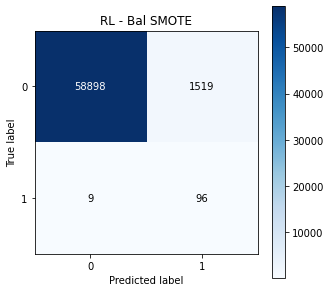

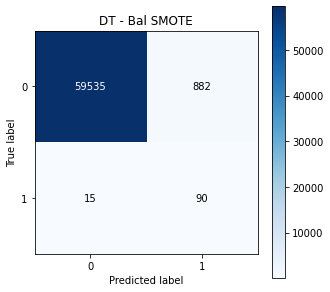

In [72]:
skplt.metrics.plot_confusion_matrix(y_teste, y_pred_RL_3, normalize = False)
plt.title('RL - Bal SMOTE')
skplt.metrics.plot_confusion_matrix(y_teste, y_pred_DT_3, normalize = False)
plt.title('DT - Bal SMOTE')
plt.show()

A *confusion matrix* permite identificar quais dos 2 tipos de erros o modelo incorreu.

Erros do **tipo 1** são os conhecidos como **falso Positivo (FP)**, para nosso caso esse erro é quando o modelo preveu que seria uma fraude ao passo que era uma transação genuína, ou seja, sabe quando você encontra uma oferta relâmpago na Amazon.com e vai comprar teu cartão nega...então... é isso... você poderá ter sido um Falso Positivo, ou ainda.. quando está comprando uma passagem aérea pela com aquele precinho na *Itapemirim Airlines*..... opa, nesse caso foi vantagem ser um Falso Positivo 😄😄😄. 

Erros do **tipo 2** são os **falso Negativo (FN)**, ou seja, foi previsto que a transação seria genuína, no entanto era fraude. Para nosso problema de negócio, haveria um prejuízo financeiro para o cliente ou a instiuição do cartão.

In [71]:
print('Matriz de Confusão: \n', '[VN, FP]', '\n', '[FN, VP]')
print(confusion_matrix(y_teste, y_pred_DT_2))

Matriz de Confusão: 
 [VN, FP] 
 [FN, VP]
[[58497  1920]
 [   14    91]]




1.   Algoritmos de Árvores Decisão obtiveram um desempenho melhor ao lidar com os dados desbalanceados.
2.   Algoritmos de Regressão Logistica foram superiores ao lidar com dados balanceados. Sendo a técnica SMOTE que obteve melhores resultados.
1.   A solução ideal é aquela que melhor atende a instituição, podendo ser a com o maior AUC, ou a com o maior número de detecção de fraudes, ou a menor taxa de FP (falso positivo).
2.   O modelo que melhor conseguiu prever fraudes foi o Modelo de Regressão Logística que treinou com dados balanceados pelo método SMOTE.

Então quer dizer que para todo modelo de classificação podemos usar a Regressão logistica e a técnica de balanceamento SMOTE?

Não... 😶😶😶 vai depender do problema de negócio que quer responder... a qualidade de seus dados... o tempo de treinamento... o volume representativo de dados.. capacidade computacional..... 😄 Por isso que *Data Science* é apaixonante!! desafios únicos a cada projeto!

## **6. Prevendo com dados novos**


In [73]:
dados_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229333,145885.0,-0.330429,0.587057,0.635175,-0.619929,0.690199,-1.146289,0.914373,-0.158436,-0.160107,-0.681300,-1.100518,-0.408600,-0.981258,0.393798,-0.287138,-0.146882,-0.284723,-0.676046,-0.070110,-0.170441,-0.172181,-0.540837,0.047329,-0.037745,-0.671478,0.119750,0.094611,0.173363,1.29,0
189242,128317.0,-17.015895,-18.501723,-2.965763,5.989228,7.811563,-4.440128,-1.905238,-1.938201,3.276087,3.752052,1.642748,0.514523,2.190782,-1.980082,3.654318,2.058084,-1.526250,0.319587,5.591971,-15.448986,-5.414098,3.688960,11.360879,0.771200,2.274458,1.954516,6.507171,-4.075417,6.37,0
232656,147253.0,0.044490,0.898231,0.306854,-0.587229,0.441139,-1.121860,1.039291,-0.231897,-0.108498,-0.422824,-0.846928,0.364602,0.429535,0.029024,-0.450167,-0.115708,-0.429364,-0.803192,-0.089995,-0.013009,-0.255365,-0.535225,0.064659,0.050984,-0.476387,0.136342,0.250095,0.098383,2.69,0
174418,121905.0,1.945191,-0.273317,-0.126410,0.436141,-0.841361,-1.026928,-0.323962,-0.216008,0.809408,-0.043048,-0.180750,1.200447,1.272197,-0.270835,0.349561,0.230839,-0.412508,-0.792333,-0.208522,-0.094742,-0.211303,-0.481833,0.466048,0.482353,-0.668233,0.198535,-0.033724,-0.033819,23.99,0


In [74]:
dados_new['Time_std'] = scaler.fit_transform(dados_new['Time'].values.reshape(-1,1))
dados_new['Amount_std'] = scaler.fit_transform(dados_new['Amount'].values.reshape(-1,1))

# d. deletar as colunas "despadronizadas"
dados_new.drop(['Time', 'Amount'], axis=1, inplace= True)
dados_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_std,Amount_std
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,0.658372,-0.177738
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,1.320094,-0.321945
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,1.219742,0.034666
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,-0.919236,0.838765
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-1.572827,-0.310490


In [75]:
X_new = dados_new.drop(columns= 'Class', axis= 1)
y_new = dados_new['Class']

In [76]:
y_pred_new = modelo_RL_3.predict(X_new)

In [78]:
print('AUC_RL_3: {:.4f}\n'.format(roc_auc_score(y_new, y_pred_new)))
print(confusion_matrix(y_new, y_pred_new))

AUC_RL_3: 0.9602

[[41556  1091]
 [    4    70]]


## **7. Bibliografia**


*   https://valor.globo.com/empresas/noticia/2021/11/09/black-friday-as-taticas-dos-criminosos-para-roubar-os-seus-dados.ghtml
*   https://epocanegocios.globo.com/Empresa/noticia/2021/10/fraude-no-cartao-e-o-maior-medo-dos-brasileiros.html

*   https://cndl.org.br/politicaspublicas/mais-de-12-milhoes-de-consumidores-sofreram-alguma-fraude-financeira-nos-ultimos-12-meses-aponta-pesquisa-cndl-spc-brasil/#:~:text=maior%20de%20pessoas.-,De%20acordo%20com%20uma%20pesquisa%20da%20Confedera%C3%A7%C3%A3o%20Nacional%20de%20Dirigentes,12%2C1%20milh%C3%B5es%20de%20pessoas.


